In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm

In [35]:
from sklearn import datasets
data = datasets.load_boston()

In [5]:
print (data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
# Creating dataframe of the predictor data
df = pd.DataFrame(data.data, columns = data.feature_names)

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [23]:
# Creating dataframe of the target variable
target = pd.DataFrame(data.target, columns = ['MEDV'])

In [24]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [25]:
# lINEAR REGRESSION using the Statsmodels

x = df['RM']
y = target['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit() # Ordinary Least Square

predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           2.49e-74
Time:                        16:05:32   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# y = mx + b

# m = 9.1021, b = -34.6706

#  The m value implies that for every unit increase in 'RM', there is an increase of 9 units in MEDV

# Also, the b value implies that, when the 'RM' is zero, the value of MEDV is negative 35.

In [31]:
# Multiple Linear Regression

x = df [['RM', 'LSTAT']]
y = target ['MEDV']

model = sm.OLS(y,x).fit()
predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:11:27   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Multiple Linear Regression using Scikit-learn (sklearn)

x = df
y = target['MEDV']

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)

print((predictions)[0:5])

[30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]


In [49]:
lm.score(x,y)

0.7406077428649428

In [50]:
# Above is the R square of the Multiple Linear Regression model (independent variable = 13, dependent variable = 1)

# That is, the explained variance of the predictions

In [51]:
# Coefficient of the predictors
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [52]:
# intercepts

lm.intercept_

36.49110328036103

In [53]:
# Train/Test Split

from sklearn.model_selection import train_test_split

In [54]:
from matplotlib import pyplot as plt

In [58]:
# Creating training and testing variables

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [59]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [62]:
# Fitting the Multiple Linear Regression model on the Training data and Predicting the model on the Testing data

lm = LinearRegression()

model = lm.fit(x_train, y_train)

predictions = lm.predict(x_test)

In [63]:
predictions[0:5]

array([32.81449305, 27.73584469, 19.9961317 , 40.47688718, 13.4789394 ])

Text(0,0.5,'Predictions')

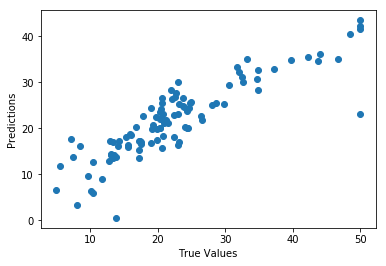

In [64]:
# Plotting the model

plt.scatter(y_test, predictions)

# Labelling
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [73]:
# Printing the Accuracy Score

print ("Accuracy Score:",model.score(x_test, y_test))

Accuracy Score: 0.7618619868401627


In [74]:
# Cross Validation

from sklearn.cross_validation import cross_val_score, cross_val_predict

from sklearn import metrics

C:\Users\Payal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
# Performing 6-folds cross validation

scores = cross_val_score(model, x, y, cv = 6)

print('Corss validated scores:', scores )

Corss validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


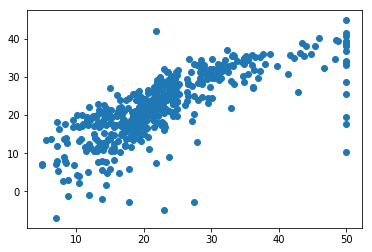

In [80]:
# Making cross validated predictions

predictions = cross_val_predict (model, x, y, cv=6)

plt.scatter (y, predictions)

In [89]:
# R square of the cross-validated model

accuracy = metrics.r2_score(y, predictions)

print('Cross-predicted Accuracy:', accuracy)

Cross-predicted Accuracy: 0.5376717677360467
